In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib import pyplot
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [2]:
pd.set_option("display.max_rows", 100, "display.max_columns", 50)

In [3]:
!ls

18hr-pred	    2hr-predFeb28
1stday-pred	    4_1_1st_day_Patient_Stay_Modeling.ipynb
1stday-pred-minmax  Model_Design.ipynb
1stday-predV2	    README.md
2h-final	    code
2h-pred		    correlation_matrix.png
2h-predFeb28	    figures



* try optimizing using the new function
* add insulin dose as predictor variable
* create a new cohort with the slopes in between the prior glucose and try it
* use SMOTE for generating more training data




In [4]:
name = '2h-final/'

base_dir =  name 

full_df = pd.read_csv(base_dir + 'event_df.csv')
full_df['Y'] = (full_df['labresult'] < 72).astype(int)

In [5]:
full_df = full_df.drop(['labresult'], axis = 1)
full_df

,Unnamed: 0,std_glucose,cv_glucose,admissionWeight,age,gender,Caucasian,African American,Hispanic,Asian,apachescore,diabetes,diabetes_t2,diabetes_t1,DKA_binary,metformin,morphine,prednisolone,dexamethasone,metoprolol,ckd,aki,kidneyDisease,liverDisease,hypertension,...,ventilation,prev_hypo,hypo_obs,glu_min,glu_last,BUN,Hct,Hgb,RDW,WBC x 1000,albumin,bicarbonate,chloride,creatinine,lactate,pH,potassium,sodium,heartrate,spo2,nibp_systolic,nibp_diastolic,temperature,insulin_binary,Y
0,0,30.635846,21.730901,73.9,68.0,1.0,1.0,0.0,0.0,0.0,70.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,138.0,138.0,41.000000,29.200000,9.800000,15.700000,11.800000,3.000000,20.000000,102.000000,2.940000,1.85,7.400000,4.600000,134.000000,96.171429,97.303030,126.485714,67.771429,38.930435,0.0,0
1,1,22.353971,16.909206,70.2,77.0,0.0,1.0,0.0,0.0,0.0,90.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,95.0,145.0,9.333333,37.866667,11.800000,15.633333,10.466667,1.550000,29.666667,104.666667,0.426667,3.50,7.450000,3.833333,143.333333,97.971429,91.424242,106.000000,60.411765,36.366667,0.0,0
2,2,16.721244,12.667609,82.2,82.0,1.0,1.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,110.0,157.0,27.666667,27.300000,8.333333,22.500000,53.933333,3.203315,18.000000,102.000000,1.433333,4.30,7.370000,4.166667,133.000000,109.772727,95.434783,115.736842,59.105263,38.292308,0.0,0
3,4,22.549390,18.843502,61.7,81.0,0.0,1.0,0.0,0.0,0.0,66.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,88.0,88.0,27.848780,34.000000,11.600000,15.000000,8.800000,3.203315,24.105834,102.221332,1.661281,1.00,7.395000,4.185714,137.337144,97.909091,99.090909,92.000000,55.000000,35.755556,0.0,0
4,5,20.883069,16.383820,92.3,59.0,1.0,1.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,105.0,105.0,9.000000,31.437500,10.000000,20.000000,3.025000,2.300000,27.285714,108.571429,0.713750,1.00,7.367500,3.671429,141.000000,93.555556,95.462963,117.445946,61.810811,36.920000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82474,148972,51.039160,41.139877,54.4,51.0,0.0,1.0,0.0,0.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,100.0,100.0,9.000000,51.000000,16.300000,16.100000,10.000000,3.400000,17.000000,117.000000,0.500000,1.00,7.274667,3.800000,143.000000,95.125000,98.857143,149.000000,87.812500,37.200000,0.0,1
82475,148973,37.193066,23.339441,55.4,50.0,0.0,0.0,1.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,167.0,167.0,7.000000,26.000000,8.300000,17.900000,7.500000,2.800000,20.000000,119.000000,0.730000,1.00,7.185000,5.100000,143.000000,67.875000,100.000000,114.250000,60.750000,36.842857,0.0,0
82476,148974,49.417594,32.437347,58.4,79.0,0.0,0.0,1.0,0.0,0.0,21.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,175.0,175.0,42.000000,28.000000,8.600000,19.500000,20.900000,3.000000,31.000000,99.000000,4.880000,1.00,7.231500,4.800000,136.000000,69.200000,100.000000,167.750000,72.500000,36.700000,0.0,0
82477,148976,56.697350,37.855528,102.0,73.0,1.0,0.0,1.0,0.0,0.0,158.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,305.0,346.0,19.000000,33.000000,10.200000,14.300000,41.800000,3.300000,20.000000,106.000000,1.810000,9.80,7.136750,3.900000,136.000000,93.100000,100.000000,134.000000,70.000000,33.160000,0.0,1


In [6]:
full_df.isna().mean().round(4) * 100

Unnamed: 0                0.0
std_glucose               0.0
cv_glucose                0.0
admissionWeight           0.0
age                       0.0
gender                    0.0
Caucasian                 0.0
African American          0.0
Hispanic                  0.0
Asian                     0.0
apachescore               0.0
diabetes                  0.0
diabetes_t2               0.0
diabetes_t1               0.0
DKA_binary                0.0
metformin                 0.0
morphine                  0.0
prednisolone              0.0
dexamethasone             0.0
metoprolol                0.0
ckd                       0.0
aki                       0.0
kidneyDisease             0.0
liverDisease              0.0
hypertension              0.0
congestiveHeartFailure    0.0
pancreasDisease           0.0
pancreatitis              0.0
sepsis                    0.0
norepinephrine            0.0
epinephrine               0.0
dopamine                  0.0
phenylephrine             0.0
vasopressi

In [7]:
full_df.columns

Index(['Unnamed: 0', 'std_glucose', 'cv_glucose', 'admissionWeight', 'age',
       'gender', 'Caucasian', 'African American', 'Hispanic', 'Asian',
       'apachescore', 'diabetes', 'diabetes_t2', 'diabetes_t1', 'DKA_binary',
       'metformin', 'morphine', 'prednisolone', 'dexamethasone', 'metoprolol',
       'ckd', 'aki', 'kidneyDisease', 'liverDisease', 'hypertension',
       'congestiveHeartFailure', 'pancreasDisease', 'pancreatitis', 'sepsis',
       'norepinephrine', 'epinephrine', 'dopamine', 'phenylephrine',
       'vasopressin', 'ventilation', 'prev_hypo', 'hypo_obs', 'glu_min',
       'glu_last', 'BUN', 'Hct', 'Hgb', 'RDW', 'WBC x 1000', 'albumin',
       'bicarbonate', 'chloride', 'creatinine', 'lactate', 'pH', 'potassium',
       'sodium', 'heartrate', 'spo2', 'nibp_systolic', 'nibp_diastolic',
       'temperature', 'insulin_binary', 'Y'],
      dtype='object')

In [8]:
model_df = full_df.dropna()

In [9]:
model_df

,Unnamed: 0,std_glucose,cv_glucose,admissionWeight,age,gender,Caucasian,African American,Hispanic,Asian,apachescore,diabetes,diabetes_t2,diabetes_t1,DKA_binary,metformin,morphine,prednisolone,dexamethasone,metoprolol,ckd,aki,kidneyDisease,liverDisease,hypertension,...,ventilation,prev_hypo,hypo_obs,glu_min,glu_last,BUN,Hct,Hgb,RDW,WBC x 1000,albumin,bicarbonate,chloride,creatinine,lactate,pH,potassium,sodium,heartrate,spo2,nibp_systolic,nibp_diastolic,temperature,insulin_binary,Y
0,0,30.635846,21.730901,73.9,68.0,1.0,1.0,0.0,0.0,0.0,70.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,138.0,138.0,41.000000,29.200000,9.800000,15.700000,11.800000,3.000000,20.000000,102.000000,2.940000,1.85,7.400000,4.600000,134.000000,96.171429,97.303030,126.485714,67.771429,38.930435,0.0,0
1,1,22.353971,16.909206,70.2,77.0,0.0,1.0,0.0,0.0,0.0,90.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,95.0,145.0,9.333333,37.866667,11.800000,15.633333,10.466667,1.550000,29.666667,104.666667,0.426667,3.50,7.450000,3.833333,143.333333,97.971429,91.424242,106.000000,60.411765,36.366667,0.0,0
2,2,16.721244,12.667609,82.2,82.0,1.0,1.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,110.0,157.0,27.666667,27.300000,8.333333,22.500000,53.933333,3.203315,18.000000,102.000000,1.433333,4.30,7.370000,4.166667,133.000000,109.772727,95.434783,115.736842,59.105263,38.292308,0.0,0
3,4,22.549390,18.843502,61.7,81.0,0.0,1.0,0.0,0.0,0.0,66.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,88.0,88.0,27.848780,34.000000,11.600000,15.000000,8.800000,3.203315,24.105834,102.221332,1.661281,1.00,7.395000,4.185714,137.337144,97.909091,99.090909,92.000000,55.000000,35.755556,0.0,0
4,5,20.883069,16.383820,92.3,59.0,1.0,1.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,105.0,105.0,9.000000,31.437500,10.000000,20.000000,3.025000,2.300000,27.285714,108.571429,0.713750,1.00,7.367500,3.671429,141.000000,93.555556,95.462963,117.445946,61.810811,36.920000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82474,148972,51.039160,41.139877,54.4,51.0,0.0,1.0,0.0,0.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,100.0,100.0,9.000000,51.000000,16.300000,16.100000,10.000000,3.400000,17.000000,117.000000,0.500000,1.00,7.274667,3.800000,143.000000,95.125000,98.857143,149.000000,87.812500,37.200000,0.0,1
82475,148973,37.193066,23.339441,55.4,50.0,0.0,0.0,1.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,167.0,167.0,7.000000,26.000000,8.300000,17.900000,7.500000,2.800000,20.000000,119.000000,0.730000,1.00,7.185000,5.100000,143.000000,67.875000,100.000000,114.250000,60.750000,36.842857,0.0,0
82476,148974,49.417594,32.437347,58.4,79.0,0.0,0.0,1.0,0.0,0.0,21.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,175.0,175.0,42.000000,28.000000,8.600000,19.500000,20.900000,3.000000,31.000000,99.000000,4.880000,1.00,7.231500,4.800000,136.000000,69.200000,100.000000,167.750000,72.500000,36.700000,0.0,0
82477,148976,56.697350,37.855528,102.0,73.0,1.0,0.0,1.0,0.0,0.0,158.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,305.0,346.0,19.000000,33.000000,10.200000,14.300000,41.800000,3.300000,20.000000,106.000000,1.810000,9.80,7.136750,3.900000,136.000000,93.100000,100.000000,134.000000,70.000000,33.160000,0.0,1


In [10]:
model_df.groupby("Y").mean().T

Y,0,1
Unnamed: 0,72128.140477,75651.164893
std_glucose,35.398167,54.350911
cv_glucose,22.808938,36.078152
admissionWeight,85.436576,80.543442
age,63.884087,62.932146
gender,0.554156,0.505442
Caucasian,0.768521,0.699884
African American,0.116459,0.170852
Hispanic,0.041662,0.042379
Asian,0.012055,0.013498


In [11]:
sum(model_df["Y"])/len(model_df)

0.1994083342426557

# Creating Train/Test Sets

In [12]:
#Add in stratify to ensure equal label distribution in test/train
train, test, train_labels, test_labels = train_test_split(model_df.drop(['Y', 'DKA_binary'], axis = 1),
                                                          model_df['Y'],
                                                          test_size=0.15,
                                                          random_state=100, stratify = model_df['Y'])



In [13]:
pred_vars = train.columns.to_list()

In [14]:
sum(train_labels)/len(train)

0.19940947408960588

In [15]:
smote = False

if(smote):
  train, train_labels = SMOTE().fit_resample(train, train_labels)

In [16]:
under = False

if(under):

  # Undersampling traning dataframe for majority class
  train_tmp = train.copy()
  train_tmp['Y'] = train_labels

  # Downsample majority class
  df_majority_downsampled = resample(train_tmp[train_tmp['Y'] == 0], 
                                  replace=False,    # sample without replacement
                                  n_samples=len(train_tmp[train_tmp['Y'] == 1]),     # to match minority class
                                  random_state=123) # reproducible results
  
  # Combine minority class with downsampled majority class
  train = pd.concat([df_majority_downsampled, train_tmp[train_tmp['Y'] == 1]])
  
  # Display new class counts
  print(train.Y.value_counts())
  train_labels = train.Y
  train = train.drop(columns=['Y'])

In [17]:
print('Training Dataset Length: ' + str(len(train)))
print('Testing Dataset Length: ' + str(len(test)))

Training Dataset Length: 70107
Testing Dataset Length: 12372


In [18]:
sum(train_labels)/len(train_labels)

0.19940947408960588

# Defining Grid Search

In [19]:
results_list = []

In [20]:
def grid_search_wrapper(clf, param_grid, refit_score='roc_auc'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """

    scorers_list = ['roc_auc', 'accuracy', 'f1', 'precision', 'recall']

    cross_val = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
    grid_search = GridSearchCV(clf, param_grid, cv=cross_val, scoring= scorers_list, refit = refit_score, return_train_score=True, n_jobs=-1)

    grid_search.fit(train, train_labels)

    # make the predictions
    y_probs = grid_search.predict_proba(test)[:,1]
    y_pred = grid_search.predict(test)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    print('Best Score for {} on Train Set: {}'.format(refit_score, grid_search.best_score_))
    print(grid_search.best_params_)

    results, results_prec, df_delta = performanceTest(test_labels, y_probs)

    results_list.append(df_delta)

    print('\nResults on Test Set Prediction (min delta):')
    for y in results.keys():
      print(str(y) + ': ' + str(np.round(results[y], 4)))

    print('\nResults on Test Set Prediction (max precision):')
    for y in results_prec.keys():
      print(str(y) + ': ' + str(np.round(results_prec[y], 4)))

    # print(roc_auc_score(test_labels, y_pred))
    # print(recall_score(test_labels, y_pred))
    # print(precision_score(test_labels, y_pred))

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(test_labels, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
      

    return grid_search

In [21]:
def performanceTest(realtarget,predictedtarget,verbose=False):
  res = []
  # Create list of threshold to be assessed
  _, _, list_threshold = roc_curve(realtarget, predictedtarget)

  # Calculate performance for each threshold
  for thr in list_threshold:
    p = np.copy(predictedtarget)
  

    # Get AUC
    fpr, tpr, _ = roc_curve(realtarget, p)
    auroc_p = auc(fpr, tpr)

    # Classification
    p[p < thr] = 0; # inferior
    p[p != 0] = 1; # sup or equal

    # Get AUPR
    precision, recall, _ = precision_recall_curve(realtarget, p)
    aupr_p = auc(recall, precision)

    # Confusion matrix
    matrix = confusion_matrix(realtarget, p)

    # Metrics
    acc = accuracy_score(realtarget, p)
    sens = recall_score(realtarget, p) # or recall
    spec = matrix[0,0]/(matrix[0,0]+matrix[0,1]) # TN/TN+FP
    pr = precision_score(realtarget, p)

    df_tmp = pd.DataFrame({'Threshold': [thr], 'Accuracy': [acc],
                           'Precision' : [pr],'Specificity': [spec],
                           'Sensitivity': [sens],'AUC': [auroc_p],
                           'AUPR': [aupr_p], 'Model' : curr_model})
      
    res.append(df_tmp)

  # The next measures are not independent from the threshold.
  res = pd.concat(res, axis=0)
  res.index = pd.RangeIndex(start=0, stop=len(list_threshold), step=1)
  
  thr_delta = res.loc[(res.Sensitivity - res.Specificity).abs().idxmin()]
  if verbose:
    print('\n')
    print(f'Minimizing \u0394(Sen-Spec): AUC={thr_delta.AUC:0.2f}')
    print(f'Minimizing \u0394(Sen-Spec): AUPR={thr_delta.AUPR:0.2f}')
    print(f'Minimizing \u0394(Sen-Spec): Sense={thr_delta.Sensitivity:0.2f}')
    print(f'Minimizing \u0394(Sen-Spec): Spec={thr_delta.Specificity:0.2f}')

  thr_prec = res.loc[res.Precision.idxmax()]
  score_loss = thr_delta.Sensitivity + thr_delta.Specificity

  d_thr_delta =  dict(thr_delta)
  del d_thr_delta['Model']
  d_thr_prec = dict(thr_prec)
  del d_thr_prec['Model']

  
  print(thr_delta)
  return d_thr_delta, d_thr_prec, thr_delta
  #return thr_delta.AUC

# Modeling

Things to try:

* SK Learn Feature Selection
* Ensemble Models
* Adding in Medication
* Each Patient is only considered once, add a feature if they had a hypoglycemic event in previous patient stay
* Minimum glucose during observation window, maybe std?

/home/smantena/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 96.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Best params for roc_auc
{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score for roc_auc on Train Set: 0.8546730339336144
{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


/home/smantena/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Threshold                0.186424
Accuracy                 0.772228
Precision                0.457823
Specificity              0.772236
Sensitivity              0.772193
AUC                      0.852118
AUPR                      0.63772
Model          LogisticRegression
Name: 1814, dtype: object

Results on Test Set Prediction (min delta):
Threshold: 0.1864
Accuracy: 0.7722
Precision: 0.4578
Specificity: 0.7722
Sensitivity: 0.7722
AUC: 0.8521
AUPR: 0.6377

Results on Test Set Prediction (max precision):
Threshold: 1.0
Accuracy: 0.8007
Precision: 1.0
Specificity: 1.0
Sensitivity: 0.0004
AUC: 0.8521
AUPR: 0.5999

Confusion matrix of Random Forest optimized for roc_auc on the test data:
     pred_neg  pred_pos
neg      9563       342
pos      1626       841


/home/smantena/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 96.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


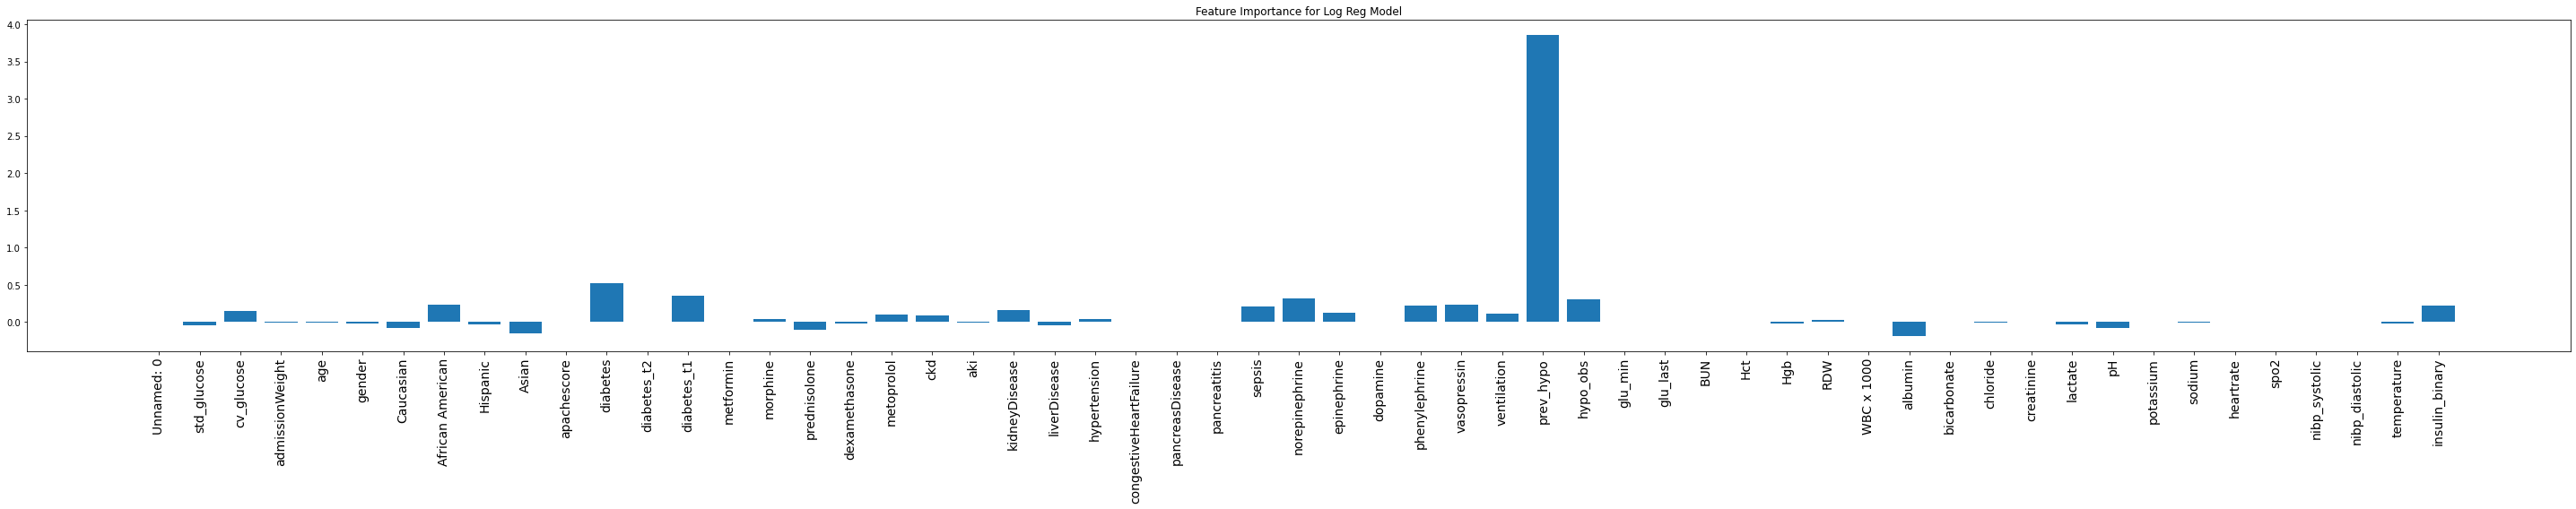

In [22]:
curr_model = 'LogisticRegression'
clf = LogisticRegression(n_jobs=-1)

param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'], 
    'C' : [100, 10, 1.0, 0.1, 0.01],
    'penalty': ['l2', 'l1']
}

grid_search = grid_search_wrapper(clf, param_grid)


importance = grid_search.best_estimator_.fit(train, train_labels).coef_[0]

fig, ax = plt.subplots(figsize = (40,8))
plt.bar(np.arange(0, len(importance)), height = importance)
plt.xticks(np.arange(0, len(importance)), labels = pred_vars, fontsize = 14, rotation = 'vertical')
plt.title("Feature Importance for Log Reg Model")

plt.tight_layout()
plt.savefig(base_dir + 'LR feature importance.jpg')
plt.show()


Best params for roc_auc
{'max_depth': 15, 'max_features': 40, 'min_samples_split': 3, 'n_estimators': 300}
Best Score for roc_auc on Train Set: 0.8827327159645838
{'max_depth': 15, 'max_features': 40, 'min_samples_split': 3, 'n_estimators': 300}


/home/smantena/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Threshold           0.237819
Accuracy            0.801164
Precision           0.500887
Specificity         0.801212
Sensitivity         0.800973
AUC                 0.886002
AUPR                0.670773
Model          Random Forest
Name: 1674, dtype: object

Results on Test Set Prediction (min delta):
Threshold: 0.2378
Accuracy: 0.8012
Precision: 0.5009
Specificity: 0.8012
Sensitivity: 0.801
AUC: 0.886
AUPR: 0.6708

Results on Test Set Prediction (max precision):
Threshold: 1.0
Accuracy: 0.8054
Precision: 1.0
Specificity: 1.0
Sensitivity: 0.0239
AUC: 0.886
AUPR: 0.6093

Confusion matrix of Random Forest optimized for roc_auc on the test data:
     pred_neg  pred_pos
neg      9487       418
pos      1369      1098


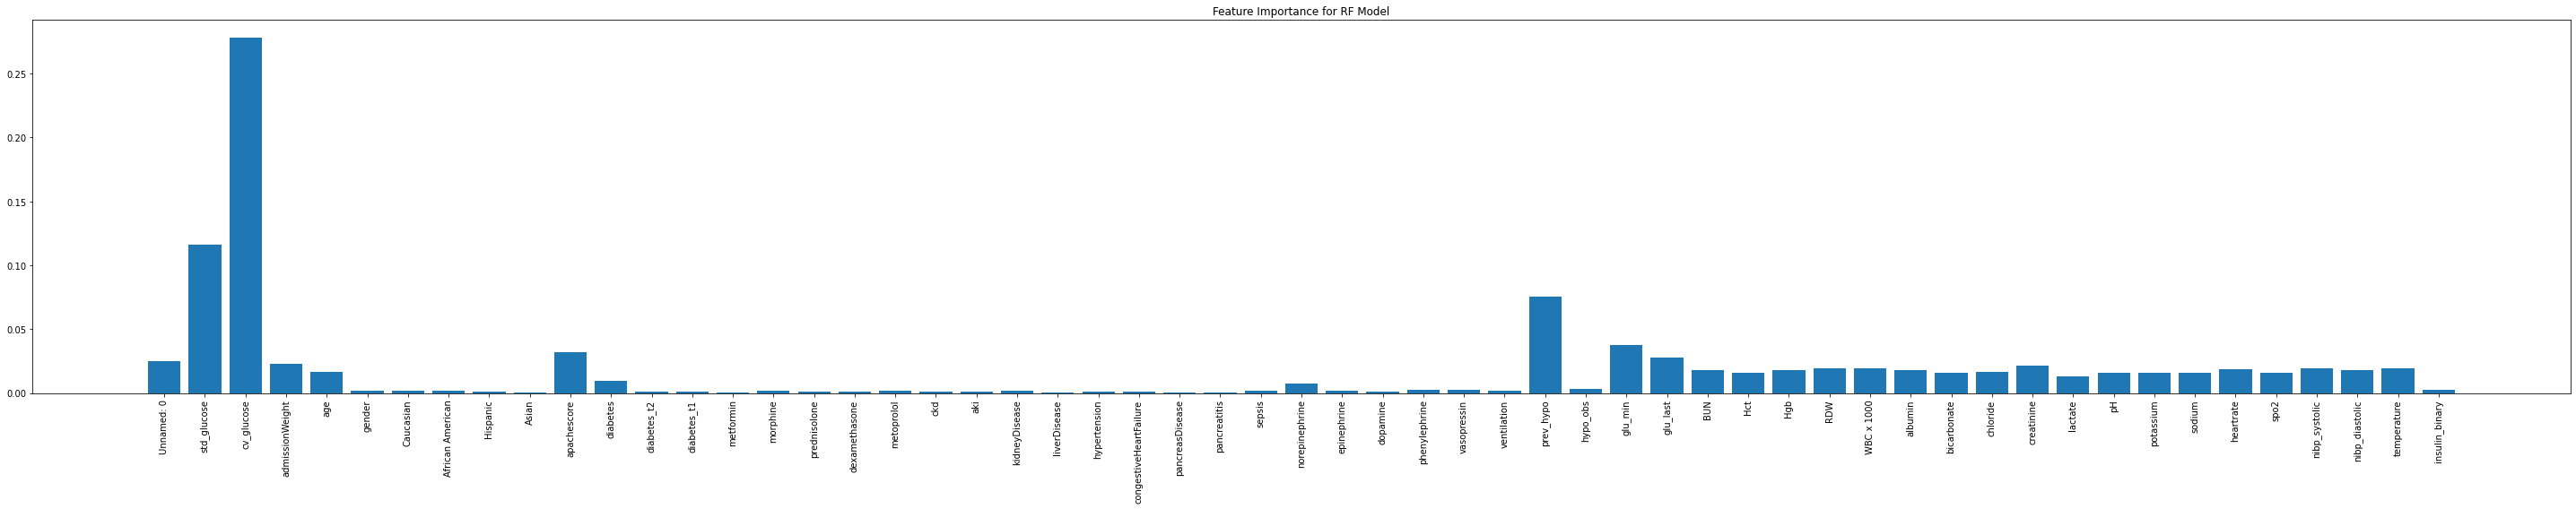

In [23]:
curr_model = 'Random Forest'
clf = RandomForestClassifier(n_jobs=-1)

param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 200, 300],
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5, 10, 20, 40]
}

results = grid_search_wrapper(clf, param_grid)

importance = results.best_estimator_.fit(train, train_labels).feature_importances_

fig, ax = plt.subplots(figsize = (40,8))
plt.bar(np.arange(0, len(importance)), height = importance)
plt.xticks(np.arange(0, len(importance)), labels = pred_vars, fontsize = 10, rotation = 'vertical')
plt.title("Feature Importance for RF Model")
plt.tight_layout()
plt.savefig(base_dir + 'RF feature importance.jpg')
plt.show()

In [ ]:
curr_model = 'XGBoost'

clf = XGBClassifier(n_jobs=-1)

param_grid = {"max_depth": [6,15],
              "min_child_weight" : [3,6],
              "n_estimators": [200],
              "learning_rate": [0.01,0.1,0.5],
              "colsample_bytree": [0.5,0.7],
              "subsample": [1],
              "max_delta_step": [0.1,3,10],
              "colsample_bylevel": [0.6, 0.7],
              "base_score": [sum(train_labels)/len(train),0.1,0.5],
              }

results = grid_search_wrapper(clf, param_grid)

In [ ]:
from pandas.plotting import table 
results_df = pd.concat(results_list, axis=1)
finaldf = results_df.T

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
table(ax, finaldf)  # where df is your data frame
plt.tight_layout()
plt.savefig(base_dir + 'results_cv.pdf')

In [ ]:
finaldf

# Cross Validation Results

In [ ]:
def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame):
  '''
  Lightweight script to test many models and find winners
  :param X_train: training split
  :param y_train: training target vector
  :param X_test: test split
  :param y_test: test target vector
  :return: DataFrame of predictions
  '''
  dfs = []
  global models
  models = [
 #           ('LinReg', LinearRegression()),
            ('LogReg', LogisticRegression()), 
            ('RF', RandomForestClassifier())
            # ,
            # ('KNN', KNeighborsClassifier()),
            # ('SVM', SVC(probability=True)), 
            # ('GNB', GaussianNB()),
            # ('XGB', XGBClassifier()),
            # ('AdaBoost', AdaBoostClassifier()),
            # ('DecisionTree', DecisionTreeClassifier()),
            # ('Bagging', BaggingClassifier()),
            # ('GradientBoosting', GradientBoostingClassifier())
          ]
    
  results = []
  names = []
  scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
  target_names = ['Control', 'Hypoglycemic']
  probs = {}
  for name, model in models:
          kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=90210)
          cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
          clf = model.fit(X_train, y_train)

          y_pred = clf.predict(X_test)
          y_probs = clf.predict_proba(X_test)[:,1]

          print(name)
          print(classification_report(y_test, y_pred, target_names=target_names))
          print(roc_auc_score(y_test, y_probs))
          results.append(cv_results)
          names.append(name)
          this_df = pd.DataFrame(cv_results)
          this_df['model'] = name
          dfs.append(this_df)
          probs[name] = y_probs
  final = pd.concat(dfs, ignore_index=True)
  

  return final, probs

In [ ]:
final, probs = run_exps(train, train_labels, test, test_labels)

In [ ]:
bootstraps = []
for model in list(set(final.model.values)):
    df_t = final.loc[final.model == model]
    #bootstrap = df_t.sample(n=30, replace=True)
    #bootstraps.append(bootstrap)
    bootstraps.append(df_t)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics

## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')

In [ ]:
results_long_nofit

In [ ]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.title('Comparison of Model by Classification Metric')
plt.savefig(base_dir + 'benchmark_models_performance.png',dpi=300)